# 2 Remove Outliers in Datasets 1 

## """Build plots to explore for outliers: (from a single file)"""

#### Dataset1: Plantas sanas de Arabidopsis
#### Cynthia Soto
#### Fecha: 24 de Julio 2020
#### Type of data: expression levels (absolute and TPM)
#### Data estimated with: Salmon SA mode 

Outliers can be removed from the data using statistical methods of IQR, Z-Score and Data Smoothing
1. For calculating IQR of a dataset first calculate it’s 1st Quartile(Q1) and 3rd Quartile(Q3) i.e. 25th and 75 percentile of the data and then subtract Q1 from Q3.
2. Z-Score tells how far a point is from the mean of dataset in terms of standard deviation.An absolute value of z score which is above 3 is termed as an outlier.
3. Data smoothing is a process to remove the spikes and peaks from the data. Moving Average, Rolling Mean and Exponential smoothing are some of the process to smooth the data. Pandas Exponential smoothing function (EWM) can be used to calculate the value at different alpha level.



In [1]:
# Libraries required
import os 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib widget

import numpy as np
import seaborn as sns
# importing Statistics module 
import statistics 
from scipy.stats import iqr
from scipy import stats

In [2]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/athal1_htseq-counts/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    
       
#print(os.listdir(os.getcwd())        

Directory changed: /home/cyntsc/Proyectos/athal1_htseq-counts


## Knowing your data basic statistics and plotting some important distributions


In [3]:
# Import Data 
df= pd.read_csv("SRR3383640_Log2.csv", sep='\t')

##Get max/min value of the numeric cols
df.select_dtypes(include=[np.number]).max()
df.select_dtypes(include=[np.number]).min()
##Get basic statics
df.describe()

## Be sure data are not object type

,Unnamed: 0,Counts,log2_value
count,27655.000000,27655.000000,27655.000000
mean,13827.000000,348.664328,4.919339
std,7983.455183,1860.469250,3.791072
min,0.000000,1.000000,0.000000
25%,6913.500000,1.000000,0.000000
50%,13827.000000,53.000000,5.727920
75%,20740.500000,282.000000,8.139551
max,27654.000000,153438.000000,17.227296


In [4]:
# Count genes with zeros
df.isin([0]).sum()

Unnamed: 0       1
Genes            0
Counts           0
log2_value    7396
dtype: int64

In [5]:
# the statement is passing a Series of True/ False objects to the DataFrame, returning all rows with True
df[df['log2_value'] == 0].head()

,Unnamed: 0,Genes,Counts,log2_value
14,14,AT1G01150,1,0.0
27,27,AT1G01280,1,0.0
30,30,AT1G01305,1,0.0
31,31,AT1G01310,1,0.0
33,33,AT1G01335,1,0.0


In [6]:
# Should the zeros be removed at this point?
df

,Unnamed: 0,Genes,Counts,log2_value
0,0,AT1G01010,92,6.523562
1,1,AT1G01020,109,6.768184
2,2,AT1G01030,14,3.807355
3,3,AT1G01040,1028,10.005625
4,4,AT1G01050,851,9.733015
...,...,...,...,...
27650,27650,ATMG01350,2,1.000000
27651,27651,ATMG01360,21,4.392317
27652,27652,ATMG01370,25,4.643856
27653,27653,ATMG01400,1,0.000000


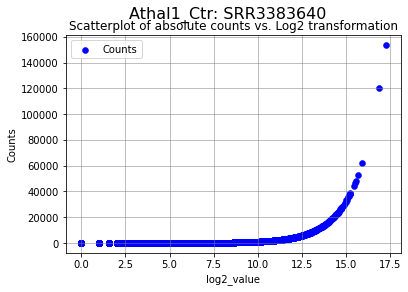

In [7]:
# Exploring: Scatterplot of absolute counts vs. Log2 transformation

# Figure 1 to tesis-data-analysis

plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.scatter('log2_value','Counts', data=df, linestyle='-',color='b', linewidth=0.5)
plt.xlabel('log2_value')
plt.ylabel('Counts')
plt.title('Scatterplot of absolute counts vs. Log2 transformation')
plt.suptitle('Athal1_Ctr: SRR3383640', fontsize=16)
plt.legend()
#plt.savefig("../athal1_stats/SRR3383640_scattered_abs_log2.png")
plt.show()

We'll now use the amazing Seaborn module to do some EDA. I strongly encourage you to look at their gallery to see some awesome examples. This module is great to make some interesting and publishable graphs for your future papers.

We'll explore our data set using different color palettes.


Text(0.5, 1.0, 'Scatterplot: Log2 versus Absolute-Counts')

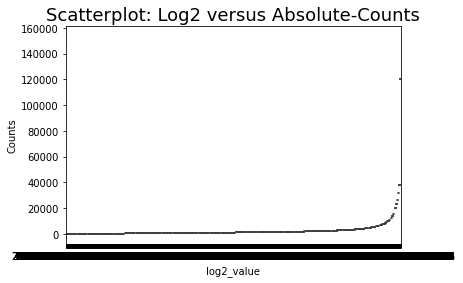

In [8]:
ax = sns.boxplot(x= df['log2_value'], y = df['Counts'], palette = "husl")
ax.set_title('Scatterplot: Log2 versus Absolute-Counts', fontsize= 18)
#ax.set_yscale('log')

Violin plots make a kernel density estimation(KDE) of the distribution. If you want a deeper intuition about what a KDE means please refer to the great Jake Van der Plas' Data Science Handbook. KDE plots are a nice way to visualize continuous distributions. The Seaborn library has some nice implementations in both the sns.distplot and sns.kdeplot functions. Here is a nice walkthrough of the different options to visualize distributions in Seaborn.

To get a better sense of the data when using violin plots, I personally prefer to set the inner parameter to quartile, as it shows the locations of the quartiles (25th, 75th percentile and the median) in the data, and gives a sense of how the data is distributed. Moreover, I like that all of the violins have the same width, so they are readily comparable to each other, thus I set the scale parameter to width


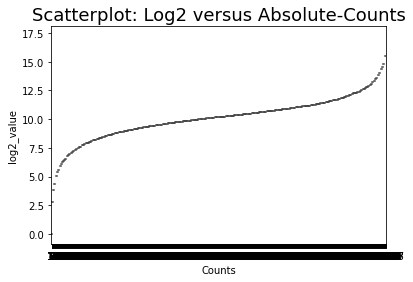

In [9]:
ax = sns.violinplot(x= df['Counts'], y = df['log2_value'], inner = 'quartile', scale= 'width', palette = "husl")
ax.set_title('Scatterplot: Log2 versus Absolute-Counts', fontsize= 18);

Violinplots are nice, but to get a real sense of the raw data, is best to use a stripplot or swarmplot to visualize the individual points in a dataset. As a general rule of thumb, always plot all your data points

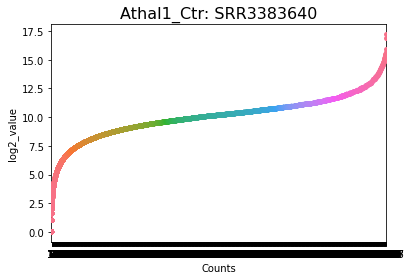

In [8]:

# Figure 2 to tesis-data-analysis

ax = sns.stripplot(x= df['Counts'], y = df['log2_value'], palette = "husl")
ax.set_title('Athal1_Ctr: SRR3383640', fontsize= 16)
# save figure to png file
fig = ax.get_figure()
#fig.savefig("../athal1_stats/SRR3383640_scattered_violinplot.png")

Now, letś go to plot a normal distribution for Log2 values

In [25]:
#Send log2 values to a vector (list) to plot a normal distribution 
col_log2_list = df['log2_value'].tolist()
#col_log2_list

In [193]:
## If want to be sure about the operation
#print("Standard Deviation of sample is % s " 
#      % (statistics.stdev(col_log2_list))) 

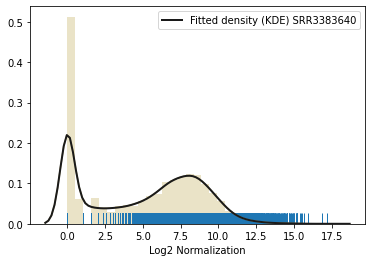

In [26]:
# Normal Distribution plot for Log2 values 
# norm_histbool, optional
# If True, the histogram height shows a density rather than a count. 
# This is implied if a KDE or fitted density is plotted

#set color codes
sns.set_color_codes()
# Get relevant information from panda series
col_log2_list = pd.Series(col_log2_list, name="Log2 Normalization")

sns.distplot(col_log2_list, color="y")
sns.distplot(col_log2_list, rug=True, hist=False, kde_kws={"color": "k", "lw": 2, "label": "Fitted density (KDE) SRR3383640"});
# rug=True, hist=False: Plot the distribution with a kernel density estimate and rug plot

plt.savefig("../athal1_stats/SRR3383640_Fitted density.png")
#Note seaborn has not savefig function

<AxesSubplot:xlabel='Log2 Normalization'>

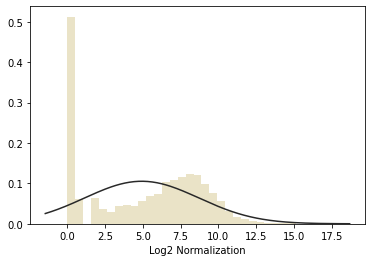

In [27]:
## Plot the distribution with a histogram and maximum likelihood Gaussian distribution fit:
from scipy.stats import norm
sns.distplot(col_log2_list, fit=norm, kde=False, color="y")

In [200]:
df.dtypes


Genes          object
Counts          int64
log2_value    float64
dtype: object

In descriptive statistics, a boxplot (also known as a box-and-whisker diagram or plot) is a convenient way of graphically depicting groups of numerical data through their five-number summaries (the smallest observation, lower quartile (Q1), median (Q2), upper quartile (Q3), and largest observation). A boxplot may also indicate which observations, if any, might be considered outliers. The boxplot was invented in 1977 by the American statistician John Tukey.

Text(0.5, 1.0, 'Boxplot of Absolute Counts')

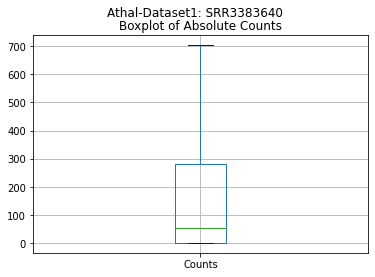

In [215]:
# Box-Whisher Plot with means 

ax = df.boxplot(column=['Counts'],showfliers=False)   ###, showmeans=True
# get rid of the automatic title
plt.suptitle("Athal-Dataset1: SRR3383640")
ax.set_xlabel("")
ax.set_title("Box-and-whisker plot: absolute-counts")


Text(0.5, 1.0, 'Boxplot of Log2 values')

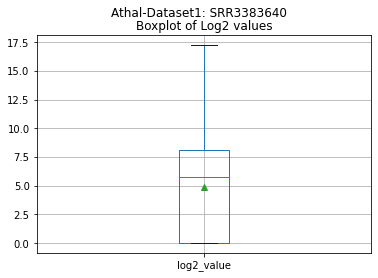

In [214]:
# Box-Whisher Plot with means 

ax = df.boxplot(column=['log2_value'],showfliers=False, showmeans=True)
# get rid of the automatic title
plt.suptitle("Athal-Dataset1: SRR3383640")
ax.set_xlabel("")
ax.set_title("Boxplot of Log2 values")

## Method 1: IQR
For calculating IQR of a dataset first calculate it’s 1st Quartile(Q1) and 3rd Quartile(Q3) i.e. 25th and 75 percentile of the data and then subtract Q1 from Q3.

### Cleaning data

Data preparation process can involve three steps: data selection, data preprocessing and data transformation.
Expected types values
    TPM:float
    NumReads: float
No missing data

I use two robust methods to remove outliers from the data and Data Smoothing techniques using Exponential Weighted Moving Average

a) IQR - Interquartile Range
b) Z-Score method for Outlier Removal

### Data Smoothing:

IQR is part of Descriptive statistics and also called as midspead, middle 50%
IQR is first Quartile minus the Third Quartile (Q3-Q1)

In [50]:
# Get the interquartile grade (IQR = Q3 - Q1)
iqr(lst_TPM, axis=0) 

98.010189

In [61]:
Q1 = np.quantile(lst_TPM,0.25)
Q3 = np.quantile(lst_TPM,0.75)
IQR = Q3 - Q1
print ("First quantile in TPM column:"+str(Q1))
print ("First third in TPM column:"+str(Q3))
print ("IQR in TPM column:"+str(IQR))
q10 = np.quantile(lst_TPM,0.10)
q90 = np.quantile(lst_TPM,0.90)
print ("10th.quantile in TPM column:"+str(q10))
print ("90th.quantile in TPM column:"+str(q90))

First quantile in TPM column:54.056874
First third in TPM column:152.067063
IQR in TPM column:98.010189
10th.quantile in TPM column:41.590169
90th.quantile in TPM column:312.417606


## Method 2: Z Score
Z score is an important measurement or score that tells how many Standard deviation above or below a number is from the mean of the dataset

Any positive Z score means the no. of standard deviation above the mean and a negative score means no. of standard deviation below the mean

In [69]:
df['z_score']=stats.zscore(df['TPM'])
df

,Name,Length,EffectiveLength,TPM,NumReads,z_score
0,TRINITY_DN688_c0_g1_i1,351,102.003,78.489229,28.0,-0.123207
1,TRINITY_DN600_c0_g1_i1,326,77.092,74.179055,20.0,-0.125477
2,TRINITY_DN685_c0_g1_i1,441,192.000,56.590790,38.0,-0.134741
3,TRINITY_DN655_c0_g1_i1,1116,867.000,27.702795,84.0,-0.149957
4,TRINITY_DN640_c0_g1_i1,652,403.000,50.375190,71.0,-0.138015
...,...,...,...,...,...,...
3196,TRINITY_DN2350_c0_g1_i1,573,324.000,36.182806,41.0,-0.145491
3197,TRINITY_DN2360_c0_g1_i1,277,34.302,133.371784,16.0,-0.094299
3198,TRINITY_DN2309_c0_g1_i1,498,249.000,51.674533,45.0,-0.137331
3199,TRINITY_DN2366_c0_g1_i1,307,58.716,642.807957,132.0,0.174031


### Empirical rule any absolute value of z-score above 3 is considered as an Outlier. This is quite debatable and may not hold true for every dataset in this world.
That is also in-line with the six sigma and statistical process control limits as well. So we have discarded any values which is above 3 values of Standard deviation to remove outliers

In [71]:
#Get max value of the numeric cols
df.select_dtypes(include=[np.number]).max()
df.select_dtypes(include=[np.number]).min()
#Get basic statics
df.describe()

,Length,EffectiveLength,TPM,NumReads,z_score
count,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03
mean,500.084349,253.335170,312.402374,155.402999,1.775802e-17
std,307.164462,305.474797,1898.835931,482.621994,1.000156e+00
min,251.000000,21.005000,0.000000,0.000000,-1.645488e-01
25%,302.000000,54.120000,54.056874,20.000000,-1.360759e-01
50%,388.000000,139.000000,86.728262,37.000000,-1.188672e-01
75%,576.000000,327.000000,152.067063,95.000000,-8.445193e-02
max,3169.000000,2920.000000,48773.745983,8725.527000,2.552559e+01


In [82]:
df_filtered= df.loc[df['z_score'].abs()<=3]
df_filtered.shape


(3180, 6)

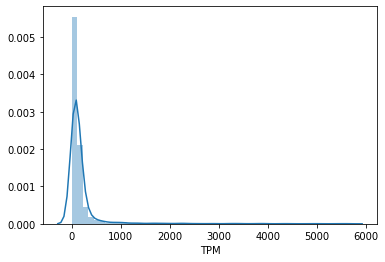

In [83]:
lst_TPM2 = df2 = df_filtered['TPM']
sns.distplot(lst_TPM2);

In [84]:
df_filtered

,Name,Length,EffectiveLength,TPM,NumReads,z_score
0,TRINITY_DN688_c0_g1_i1,351,102.003,78.489229,28.0,-0.123207
1,TRINITY_DN600_c0_g1_i1,326,77.092,74.179055,20.0,-0.125477
2,TRINITY_DN685_c0_g1_i1,441,192.000,56.590790,38.0,-0.134741
3,TRINITY_DN655_c0_g1_i1,1116,867.000,27.702795,84.0,-0.149957
4,TRINITY_DN640_c0_g1_i1,652,403.000,50.375190,71.0,-0.138015
...,...,...,...,...,...,...
3196,TRINITY_DN2350_c0_g1_i1,573,324.000,36.182806,41.0,-0.145491
3197,TRINITY_DN2360_c0_g1_i1,277,34.302,133.371784,16.0,-0.094299
3198,TRINITY_DN2309_c0_g1_i1,498,249.000,51.674533,45.0,-0.137331
3199,TRINITY_DN2366_c0_g1_i1,307,58.716,642.807957,132.0,0.174031


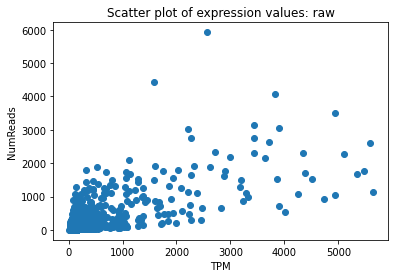

In [95]:
# Scatted plot absolute counts versus normalized count
plt.scatter('TPM','NumReads', data=df_filtered)
plt.xlabel('TPM')
plt.ylabel('NumReads')
plt.title('Scatter plot of expression values: raw')
plt.show()

In [88]:
Q1 = np.quantile(lst_TPM2,0.25)
Q3 = np.quantile(lst_TPM2,0.75)
IQR = Q3 - Q1
print ("First quantile in TPM column:"+str(Q1))
print ("First third in TPM column:"+str(Q3))
print ("IQR in TPM column:"+str(IQR))
q10 = np.quantile(lst_TPM2,0.10)
q90 = np.quantile(lst_TPM2,0.90)
print ("10th.quantile in TPM column:"+str(q10))
print ("90th.quantile in TPM column:"+str(q90))

First quantile in TPM column:53.929691000000005
First third in TPM column:150.01085899999998
IQR in TPM column:96.08116799999998
10th.quantile in TPM column:41.5571579
90th.quantile in TPM column:296.61221639999997


In [89]:
#Get max value of the numeric cols
df_filtered.select_dtypes(include=[np.number]).max()
df_filtered.select_dtypes(include=[np.number]).min()
#Get basic statics
df_filtered.describe()

,Length,EffectiveLength,TPM,NumReads,z_score
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,501.270126,254.510504,194.892500,131.053613,-0.061895
std,307.800724,306.113662,467.603745,323.281334,0.246297
min,251.000000,21.005000,0.000000,0.000000,-0.164549
25%,303.000000,55.027000,53.929691,20.000000,-0.136143
50%,388.500000,139.500000,86.338651,36.000000,-0.119072
75%,577.000000,328.000000,150.010859,92.250000,-0.085535
max,3169.000000,2920.000000,5638.732013,5923.000000,2.805488


## Method 3: Data Smoothing with Exponential smoothing(EWMA)

Smoothing of data is done for a variety of reasons and one of them is eliminating the spikes and outliers. If there is some outliers which are really high or a absolute low then smoothing helps to summarize the data and remove the noise from the data.

Use various techniques like rolling mean, moving averages and Exponential smoothing(EWMA)

The Exponential Smoothing(EWMA) unlike moving average which doesn’t treat all the data points equally while smoothing. Most of the time in a Time series data we want to treat the most recent data with more weight than the previous data.

For example: if your current value if 12 and previous value is 8 and smoothing level is 0.6 then the smoothed value is given by 12*0.6 + (1-0.6)*8

### Finding Exponential Smoothing values using Pandas

In [100]:
df.shape

(3201, 6)

In [101]:
df['ewm_alpha_1']=df['TPM'].ewm(alpha=0.1).mean()
df['ewm_alpha_3']=df['TPM'].ewm(alpha=0.3).mean()
df['ewm_alpha_6']=df['TPM'].ewm(alpha=0.6).mean()
df

,Name,Length,EffectiveLength,TPM,NumReads,z_score,ewm_alpha_1,ewm_alpha_3,ewm_alpha_6
0,TRINITY_DN688_c0_g1_i1,351,102.003,78.489229,28.0,-0.123207,78.489229,78.489229,78.489229
1,TRINITY_DN600_c0_g1_i1,326,77.092,74.179055,20.0,-0.125477,76.220716,75.953833,75.410533
2,TRINITY_DN685_c0_g1_i1,441,192.000,56.590790,38.0,-0.134741,68.977201,67.112261,63.346595
3,TRINITY_DN655_c0_g1_i1,1116,867.000,27.702795,84.0,-0.149957,56.975338,51.553845,41.398442
4,TRINITY_DN640_c0_g1_i1,652,403.000,50.375190,71.0,-0.138015,55.363620,51.128814,46.840215
...,...,...,...,...,...,...,...,...,...
3196,TRINITY_DN2350_c0_g1_i1,573,324.000,36.182806,41.0,-0.145491,176.168418,122.386010,103.026309
3197,TRINITY_DN2360_c0_g1_i1,277,34.302,133.371784,16.0,-0.094299,171.888755,125.681742,121.233594
3198,TRINITY_DN2309_c0_g1_i1,498,249.000,51.674533,45.0,-0.137331,159.867333,103.479579,79.498157
3199,TRINITY_DN2366_c0_g1_i1,307,58.716,642.807957,132.0,0.174031,208.161395,265.278093,417.484037
